In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

In [2]:
plt.rcParams.update({"text.usetex": True})

In [3]:
data = pd.read_csv("data.csv")
data.columns = ["V", "f", "f0", "T", "theta"];

data.drop([21], inplace=True)
data.drop([24], inplace=True)

In [4]:
f = lambda x: np.float(x.split()[0])
data_ = data.copy()
for col in data.columns:
    data_[col] = data[col].map(f)

# data_.f0 = np.mean(data_.f0) # замена f0 на среднее значение
data_.head()

,V,f,f0,T,theta
0,-0.89,905.30,954.0,4.51,9.051
1,-0.77,905.45,953.7,7.44,9.139
2,-0.63,905.30,953.8,10.85,9.090
3,-0.52,906.30,954.0,13.54,9.256
4,-0.44,907.90,954.0,15.49,9.603


In [5]:
## зависимость f_0 от Т
# print("f0 = {:.2f} +- {:.2f}".format(np.mean(data_.f0), np.std(data_.f0)))

# fig, ax = plt.subplots(dpi=150)
# ax.errorbar(data_["T"]+273, (np.mean(data_.f0) - data_.f0)/np.mean(data_.f0)*100, color="g", 
#            fmt=",", xerr=0.5, yerr=0.2 / np.mean(data_.f0)*100)
# ax.minorticks_on()
# ax.grid(b=True, which='major', color='k', linestyle='-', alpha=0.2)
# ax.grid(b=True, which='minor', color='k', linestyle='--', alpha=0.1)
# plt.ylabel("$(\\langle f_0 \\rangle - f_0) / \\langle f_0 \\rangle,\\ \\%$")
# plt.xlabel("$T,\\ \\mathrm K$")
# plt.show()

In [6]:
_f = data_.f;
_f0 = data_.f0;

y = _f**2 / (_f0**2 - _f**2);
x = data_["T"] + 273;

In [7]:
d_f  = 0.1;
d_f0 = 0.2;
err_rel = 2 * np.abs(d_f / _f) + np.abs((2 * _f0 * d_f0 + 2 * _f * d_f) / (_f0**2 - _f**2))
err_abs = err_rel * y

In [65]:
start = 8
end   = 16

def fit_f(x, x0, a): return (x-x0) * a;
(T_K, a), cov = curve_fit(fit_f, x[start:end], y[start:end])
print("T_K = {:.1f} +- {:.1f} К".format(T_K, np.ceil(cov[0][0]**0.5)))

T_K = 290.9 +- 1.0 К


In [66]:
chi2 = np.sum(((x[start:end] - T_K) * a - y[start:end])**2 / (a**2 * 0.5**2 + err_abs[start:end]**2)) / (end-start-2)
chi2

0.4528866004080969

T_K = 290.9 +- 1.0


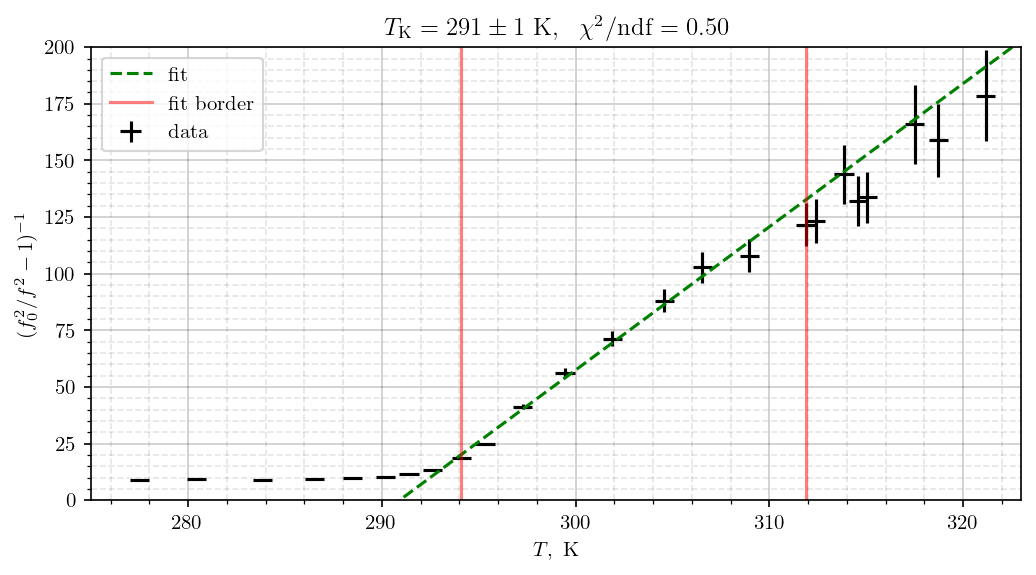

In [67]:
fig, ax = plt.subplots(figsize=(8, 4), dpi=150)
x0 = np.linspace(200, 400, 20)
ax.errorbar(x, y, color="k", fmt=",", xerr=0.5, yerr=err_abs, label="$\\mathrm{data}$")
ax.plot(x0, (x0 - T_K) * a, "--", color="g", label="$\\mathrm{fit}$")

ax.plot([x[start], x[start]], [0, 200], color="r", label="$\\mathrm{fit\\ border}$", alpha=0.5)
ax.plot([x[end], x[end]], [0, 200], color="r", alpha=0.5)

ax.minorticks_on()
ax.grid(b=True, which='major', color='k', linestyle='-', alpha=0.2)
ax.grid(b=True, which='minor', color='k', linestyle='--', alpha=0.1)
plt.xlim(275, 323)
plt.ylim(0, 200)
print("T_K = {:.1f} +- {:.1f}".format(T_K, np.ceil(cov[0][0]**0.5)))
plt.title("$T_{\\mathrm{K}} = 291 \\pm 1\\ \\mathrm{K},\\ \\ \\chi^2/\\mathrm{ndf} = 0.50$")
plt.legend()
plt.ylabel("$(f_0^2/f^2-1)^{-1}$")
plt.xlabel("$T,\\ \\mathrm K$")
plt.savefig("plot.pdf")
plt.show()

In [29]:
data_p = data_.copy()
data_p["f"] = np.round(data_p["f"], 1)
data_p["f0"] = np.round(data_p["f0"], 1)
data_p["T"] = np.round(data_p["T"], 1)
data_p["theta"] = np.round(data_p["theta"], 1)
data_p["sigma"] = np.round(err_abs, 1)
print(data_p.to_latex(index=False))

\begin{tabular}{rrrrrr}
\toprule
    V &     f &    f0 &    T &  theta &  sigma \\
\midrule
-0.89 & 905.3 & 954.0 &  4.5 &    9.1 &    0.1 \\
-0.77 & 905.4 & 953.7 &  7.4 &    9.1 &    0.1 \\
-0.63 & 905.3 & 953.8 & 10.8 &    9.1 &    0.1 \\
-0.52 & 906.3 & 954.0 & 13.5 &    9.3 &    0.1 \\
-0.44 & 907.9 & 954.0 & 15.5 &    9.6 &    0.1 \\
-0.37 & 910.5 & 954.0 & 17.2 &   10.2 &    0.1 \\
-0.32 & 914.7 & 954.1 & 18.4 &   11.4 &    0.1 \\
-0.27 & 920.0 & 953.9 & 19.6 &   13.4 &    0.1 \\
-0.21 & 929.2 & 954.0 & 21.1 &   18.5 &    0.2 \\
-0.16 & 935.6 & 954.2 & 22.3 &   24.8 &    0.4 \\
-0.08 & 942.4 & 953.8 & 24.3 &   41.2 &    1.1 \\
 0.01 & 946.0 & 954.4 & 26.5 &   56.3 &    2.0 \\
 0.11 & 947.8 & 954.4 & 28.9 &   71.4 &    3.3 \\
 0.22 & 949.0 & 954.4 & 31.6 &   88.0 &    4.9 \\
 0.30 & 949.8 & 954.4 & 33.5 &  102.8 &    6.7 \\
 0.40 & 950.0 & 954.4 & 36.0 &  108.0 &    7.4 \\
 0.52 & 950.5 & 954.4 & 38.9 &  121.6 &    9.4 \\
 0.54 & 950.6 & 954.4 & 39.4 &  123.3 &    9.6 \\
 0.60 & 